In [26]:
%matplotlib inline

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
pd.options.display.float_format = '{:.2f}'.format

In [29]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [30]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.2)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.2)
    return cheb_high

def harmonic(n):
    return sum([1 / (i+1) for i in range(n)])

In [31]:
df = pd.read_csv("test_small.csv"); df

,n,min,max
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
99995,100,1,19
99996,100,3,34
99997,100,3,30
99998,100,4,28


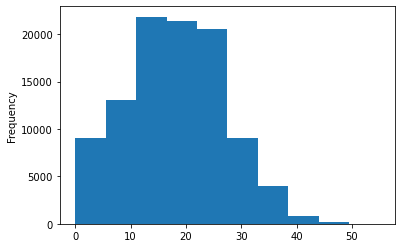

In [32]:
df["max"].plot.hist()

In [33]:
df.groupby("n")["max"].describe()

,count,mean,std,min,25%,50%,75%,max
n,,,,,,,,
1,1000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1000.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
3,1000.00,1.80,0.40,1.00,2.00,2.00,2.00,2.00
4,1000.00,2.59,0.49,2.00,2.00,3.00,3.00,3.00
5,1000.00,3.26,0.66,2.00,3.00,3.00,4.00,4.00
...,...,...,...,...,...,...,...,...
96,1000.00,28.31,6.04,15.00,24.00,28.00,32.00,55.00
97,1000.00,28.70,6.30,15.00,24.00,28.00,33.00,51.00
98,1000.00,28.52,6.15,15.00,24.00,28.00,32.00,50.00


In [34]:
# df["min"].plot.hist()

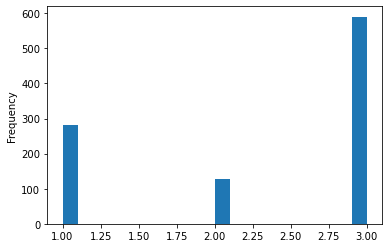

In [35]:
df.groupby("n").get_group(4)["min"].plot.hist(bins=20)

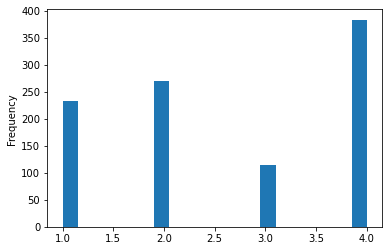

In [38]:
df.groupby("n").get_group(5)["min"].plot.hist(bins=20)

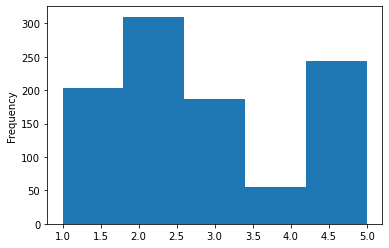

In [45]:
df.groupby("n").get_group(6)["min"].plot.hist(bins=5)

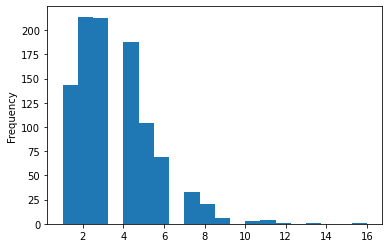

In [40]:
df.groupby("n").get_group(100)["min"].plot.hist(bins=20)

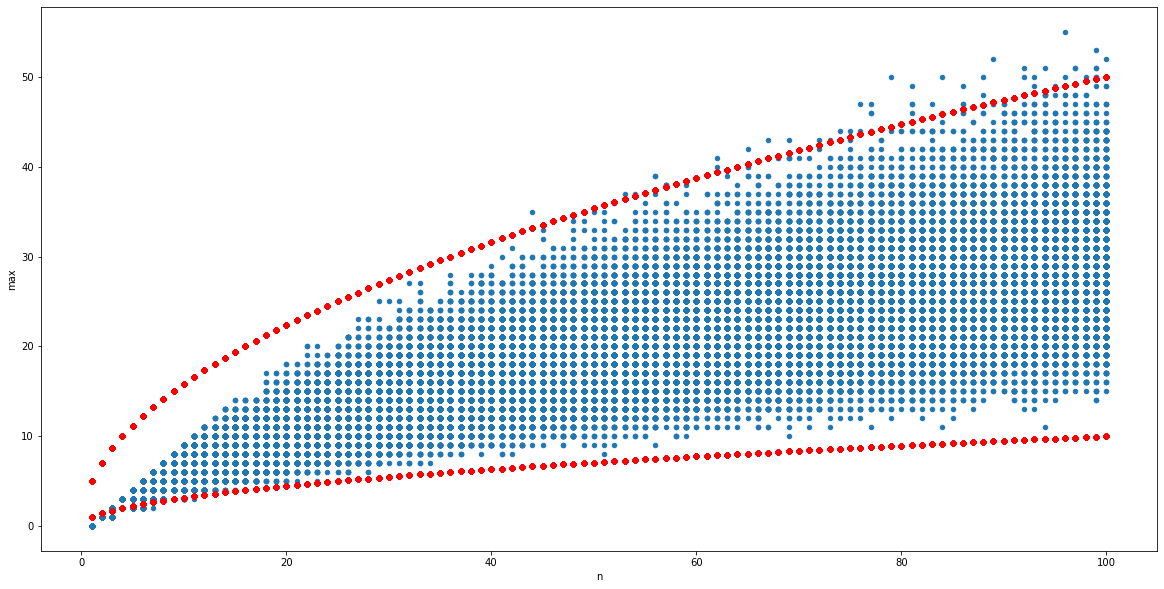

In [44]:
_LOWER_BOUND_MULTIPLIER = 1.0
_UPPER_BOUND_MULTIPLIER = 5.0

df2 = pd.DataFrame({ "n": df["n"].values, "max": [_LOWER_BOUND_MULTIPLIER*np.sqrt(n) for n in df["n"].values]})
df3 = pd.DataFrame({ "n": df["n"].values, "max": [_UPPER_BOUND_MULTIPLIER*np.sqrt(n) for n in df["n"].values]})

ax = df.plot.scatter(x="n", y="max", figsize=(10, 5))
ax2 = df2.plot.scatter(x="n", y="max", figsize=(20, 10), color="red", ax=ax)
df3.plot.scatter(x="n", y="max", figsize=(20, 10), color="red", ax=ax2)

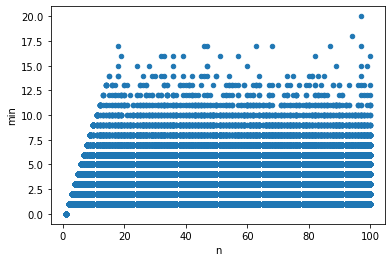

In [42]:
ax = df.plot.scatter(x="n", y="min")

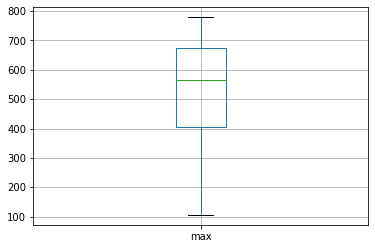

In [60]:
grouped = df.groupby(["n"])
grouped.mean().boxplot("max")

In [46]:
# grouped.plot()

In [47]:
grouped.mean()

,min,max
n,,
1000,3.61,105.83
2000,3.52,150.16
3000,3.52,177.42
4000,3.53,219.33
5000,3.19,234.69
6000,3.79,261.07
7000,3.40,286.50
8000,3.30,312.46
9000,2.97,326.04


# Max

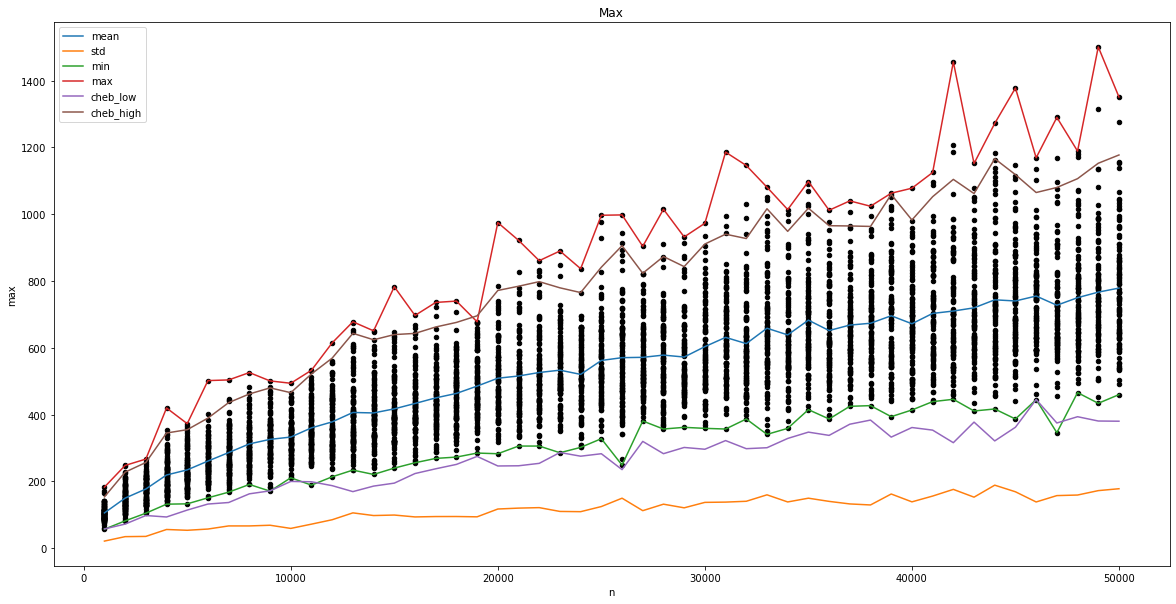

In [61]:
described = grouped["max"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
ax = described.plot(title="Max", figsize=(20,10))
df.plot.scatter(x="n", y="max", color="black", figsize=(20, 10), ax=ax)